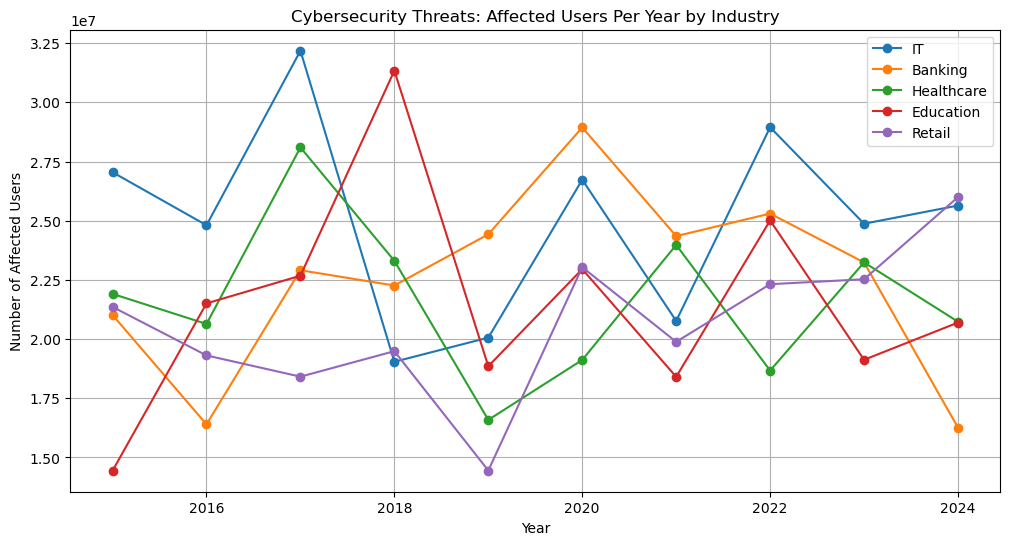

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Affected Users By Target Industry per Year
# Dataset
data = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

# Group by 'Target Industry' and sum values
stats = data.groupby("Target Industry")[["Number of Affected Users", "Financial Loss (in Million $)"]].sum()
stats = stats.sort_values(by="Number of Affected Users", ascending=False)

# Get unique years
years = sorted(data["Year"].unique())
stats_year = stats.copy()
stats_year_financial = stats.copy()

# Add total per year for each year
for dt in years:
    yearly_data = data[data["Year"] == dt].groupby("Target Industry")[["Number of Affected Users"]].sum()
    stats_year[dt] = yearly_data["Number of Affected Users"]

stats_year = stats_year.fillna(0) 

# Plot
plt.figure(figsize=(12, 6))
for industry in stats_year.index[:5]:  # Plot only top 5 industries
    plt.plot(years, stats_year.loc[industry, years], marker="o", label=industry)

# Line Chart
plt.xlabel("Year")
plt.ylabel("Number of Affected Users")
plt.title("Total Affected Users Per Year by Target Industry")
plt.legend()
plt.grid(True)
plt.show()